In [1]:

# 14. REGULARIZATION: RIDGE, LASSO, ELASTIC NET


# Regularization helps prevent overfitting by adding a penalty to the model’s coefficients.
# We will compare:
# - Linear Regression (baseline)
# - Ridge Regression (L2 penalty)
# - Lasso Regression (L1 penalty)
# - Elastic Net (L1 + L2 penalty)

# Dataset: California Housing (continuous target)
# -----------------------------------------------

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

X.head(), y[:5]


(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  ,
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: MedHouseVal, dtype: float64)

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

models = {
     "Linear Regression": LinearRegression(),
    "Ridge (alpha=10)": Ridge(alpha=10),
    "Lasso (alpha=0.1)": Lasso(alpha=0.1),
    "ElasticNet (alpha=0.1)": ElasticNet(alpha=0.1, l1_ratio=0.5)
}


results = {}

for name, model in models.items():
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    scores = cross_val_score(pipe, X_train, y_train,
                             scoring="neg_mean_squared_error",
                             cv=5)

    results[name] = np.mean(scores)

results


{'Linear Regression': np.float64(-0.5192652011433679),
 'Ridge (alpha=10)': np.float64(-0.5192827473015386),
 'Lasso (alpha=0.1)': np.float64(-0.6720918682458478),
 'ElasticNet (alpha=0.1)': np.float64(-0.6275112428717317)}

In [10]:
for name, score in results.items():
    print(f"{name:20} | MSE: {-score:.4f}")


Linear Regression    | MSE: 0.5193
Ridge (alpha=10)     | MSE: 0.5193
Lasso (alpha=0.1)    | MSE: 0.6721
ElasticNet (alpha=0.1) | MSE: 0.6275


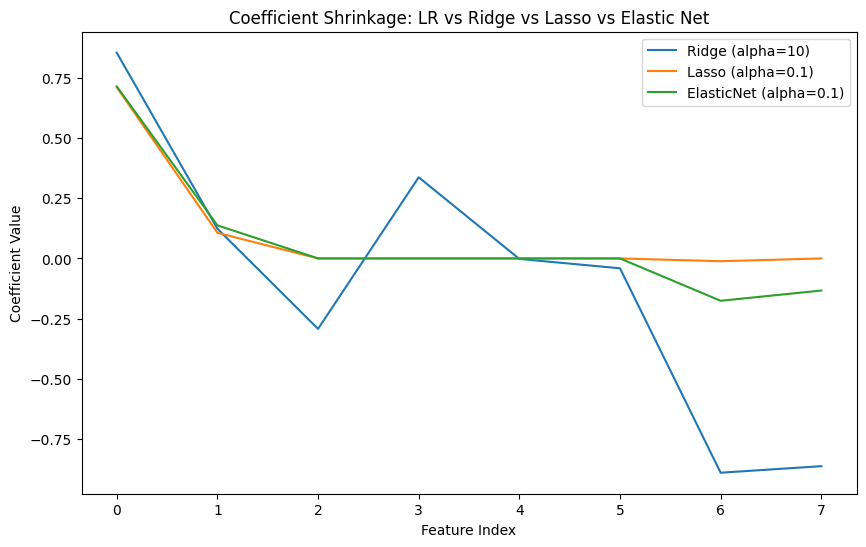

In [8]:
# Fit each model after scaling to extract coefficients
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

coefs = {}
for name, model in models.items():
    model.fit(X_scaled, y_train)
    coefs[name] = model.coef_

plt.figure(figsize=(10,6))
for name, c in coefs.items():
    plt.plot(c, label=name)

plt.legend()
plt.title("Coefficient Shrinkage: LR vs Ridge vs Lasso vs Elastic Net")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.show()
